# Animate the n-body simulation

Here, we will follow instructions to execute an $n$-body simulation from Hut and Makino [here](https://www.ids.ias.edu/~piet/act/comp/algorithms/starter).

This is a third-party software so we will download it, compile it (it is in `C++`), and use it to execute a simulation. We will then use `python` tools to animate the trajectory after it has been simulated. 

## Download, compile

In [1]:
! wget https://www.ids.ias.edu/sites/ids.ias.edu/files/imported/act/comp/algorithms/starter/nbody_sh1.tar.gz
! mkdir hut_makino
! tar -zxvf nbody_sh1.tar.gz --directory hut_makino
! g++ hut_makino/nbody_sh1.C -o hut_makino/nbody_sh1
! chmod +x hut_makino/nbody_sh1

--2020-01-24 17:27:39--  https://www.ids.ias.edu/sites/ids.ias.edu/files/imported/act/comp/algorithms/starter/nbody_sh1.tar.gz
Resolving www.ids.ias.edu (www.ids.ias.edu)... 52.2.31.152, 52.71.57.50
Connecting to www.ids.ias.edu (www.ids.ias.edu)|52.2.31.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89556 (87K) [application/x-gzip]
Saving to: ‘nbody_sh1.tar.gz’

nbody_sh1.tar.gz    100%[===================>]  87.46K  --.-KB/s    in 0.03s   

2020-01-24 17:27:39 (3.00 MB/s) - ‘nbody_sh1.tar.gz’ saved [89556/89556]

nbody_sh1.C
nbody_sh1.ps
README


### Execute a Figure-8

In [2]:
! ./hut_makino/nbody_sh1 -o 0.01 < figure8.in > figure8.out

Starting a Hermite integration for a 3-body system,
  from time t = 0 with time step control parameter dt_param = 0.03  until time 10 ,
  with diagnostics output interval dt_dia = 1,
  and snapshot output interval dt_out = 0.01.
at time t = 0 , after 0 steps :
  E_kin = 1.21286 , E_pot = -2.4999 , E_tot = -1.28705
                absolute energy error: E_tot - E_init = 0
                relative energy error: (E_tot - E_init) / E_init = -0
at time t = 1.00968 , after 90 steps :
  E_kin = 1.21514 , E_pot = -2.50219 , E_tot = -1.28705
                absolute energy error: E_tot - E_init = -3.27892e-10
                relative energy error: (E_tot - E_init) / E_init = 2.54763e-10
at time t = 2.00824 , after 179 steps :
  E_kin = 1.22441 , E_pot = -2.51145 , E_tot = -1.28705
                absolute energy error: E_tot - E_init = -1.54115e-08
                relative energy error: (E_tot - E_init) / E_init = 1.19743e-08
at time t = 3.01089 , after 268 steps :
  E_kin = 1.23888 , E_pot = -

### Execute a random configuration

In [3]:
! python generate_random_start.py > random.in
! ./hut_makino/nbody_sh1 -o 0.01 < random.in > random.out

Starting a Hermite integration for a 15-body system,
  from time t = 0 with time step control parameter dt_param = 0.03  until time 10 ,
  with diagnostics output interval dt_dia = 1,
  and snapshot output interval dt_out = 0.01.
at time t = 0 , after 0 steps :
  E_kin = 4.89969 , E_pot = -169.243 , E_tot = -164.343
                absolute energy error: E_tot - E_init = 0
                relative energy error: (E_tot - E_init) / E_init = -0
at time t = 1 , after 758061 steps :
  E_kin = 379.241 , E_pot = -543.942 , E_tot = -164.701
                absolute energy error: E_tot - E_init = -0.35825
                relative energy error: (E_tot - E_init) / E_init = 0.00217989
at time t = 2 , after 1927459 steps :
  E_kin = 260.389 , E_pot = -425.555 , E_tot = -165.166
                absolute energy error: E_tot - E_init = -0.823383
                relative energy error: (E_tot - E_init) / E_init = 0.00501015
at time t = 3 , after 3099696 steps :
  E_kin = 319.492 , E_pot = -485.124 , E_t

## Make the animation

In [4]:
import matplotlib
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

import matplotlib.pyplot as plt
import numpy as np
from read_orbit import read_orbit

In [5]:
class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, filename="figure8.out"):
        self.stream = self.data_stream()
        self.nobj, self.snapshots = read_orbit(filename)        
        
        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=10, frames=500,
                                           init_func=self.setup_plot, blit=False)

    def setup_plot(self):

        """Initial drawing of the scatter plot."""
        x, y = next(self.stream).T
        self.scat = self.ax.scatter(x, y, animated=True)
        self.ax.axis([-10, 10, -10, 10])

        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,
    

    def data_stream(self):
        
        i = 0
        x = [0.] * self.nobj
        y = [0.] * self.nobj
        while True:
            if i >= len(self.snapshots):
                i = 0
            snapshot = self.snapshots[i]
            for iparticle,particle in enumerate(snapshot):
                x[iparticle] = particle.pos[0]
                y[iparticle] = particle.pos[1]
            i += 1
            yield np.c_ [x,y]
            

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)

        # Set x and y data...
        self.scat.set_offsets(data)

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,


## Animate!

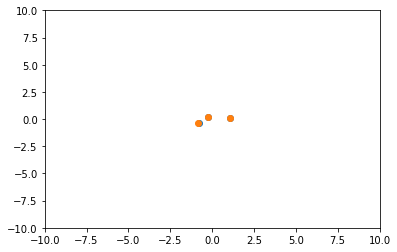

In [6]:
a = AnimatedScatter(filename="figure8.out")        
HTML(a.ani.to_html5_video())

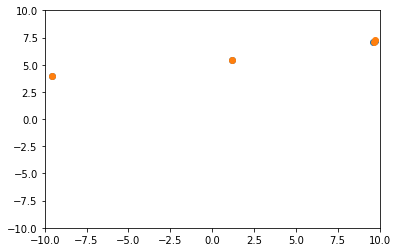

In [7]:
a = AnimatedScatter(filename="random.out")        
HTML(a.ani.to_html5_video())